# Выгрузка данных и попытка постановки задачи

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('credit_train.csv')
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0



* Loan ID
* Customer ID
* Loan Status                       целевая переменная
    * Fully Paid
    * Charged Off    
* Current Loan Amount               сколько осталось выплатить
* Term                              срок кредитования
    * Short Term
    * Long Term
* Credit Score                    
* Annual Income                     годовой доход
* Years in current job              срок службы на текущем месте работы
    * 8 years
    * 10+ years
    * 3 years
    * 5 years
    * < 1 year
    * 2 years
    * 4 years
    * 9 years
    * 7 years
    * 1 year
    * 6 years
* Home Ownership                    недвижимость в собственности
    * Home Mortgage  дом в залоге
    * Own Home
    * Rent
    * Have Mortgage  выплачивают ипотеку
* Purpose                           цель займа
    * Home Improvements
    * Debt Consolidation
    * Buy House
    * other
    * Business Loan
    * Buy a Car
    * major_purchase
    * Take a Trip
    * Other
    * small_business
    * Medical Bills
    * wedding
    * vacation
    * Educational Expenses
    * moving
    * renewable_energy
* Monthly Debt                      
* Years of Credit History           длительность кредитной истории
* Months since last delinquent      количество месяцев с последней задолженности
* Number of Open Accounts           количество открытых счетов
* Number of Credit Problems          
* Current Credit Balance             
* Maximum Open Credit                
* Bankruptcies                       
* Tax Liens

In [4]:
df.shape

(100514, 19)

In [5]:
df.dtypes

Loan ID                          object
Customer ID                      object
Loan Status                      object
Current Loan Amount             float64
Term                             object
Credit Score                    float64
Annual Income                   float64
Years in current job             object
Home Ownership                   object
Purpose                          object
Monthly Debt                    float64
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts         float64
Number of Credit Problems       float64
Current Credit Balance          float64
Maximum Open Credit             float64
Bankruptcies                    float64
Tax Liens                       float64
dtype: object

In [6]:
df.nunique()

Loan ID                         81999
Customer ID                     81999
Loan Status                         2
Current Loan Amount             22004
Term                                2
Credit Score                      324
Annual Income                   36174
Years in current job               11
Home Ownership                      4
Purpose                            16
Monthly Debt                    65765
Years of Credit History           506
Months since last delinquent      116
Number of Open Accounts            51
Number of Credit Problems          14
Current Credit Balance          32730
Maximum Open Credit             44596
Bankruptcies                        8
Tax Liens                          12
dtype: int64

In [7]:
df['Loan Status'].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [8]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.096652,0.013112,-0.006643,0.019282,0.011248,0.001478,-0.002795,0.003880,-0.001271,-0.000608,-0.002048
Credit Score,-0.096652,1.000000,-0.017078,-0.001674,-0.009720,-0.003739,0.006435,-0.003022,-0.000104,-0.002827,-0.006935,0.005146
Annual Income,0.013112,-0.017078,1.000000,0.485230,0.161669,-0.077577,0.146175,-0.017006,0.312340,0.053064,-0.047672,0.040167
Monthly Debt,-0.006643,-0.001674,0.485230,1.000000,0.199289,-0.056818,0.411353,-0.055383,0.481348,0.039268,-0.078979,0.020119
Years of Credit History,0.019282,-0.009720,0.161669,0.199289,1.000000,-0.044292,0.132349,0.061588,0.208470,0.031124,0.066247,0.017245
Months since last delinquent,0.011248,-0.003739,-0.077577,-0.056818,-0.044292,1.000000,-0.032569,0.104642,-0.028662,-0.008785,0.123951,0.012624
Number of Open Accounts,0.001478,0.006435,0.146175,0.411353,0.132349,-0.032569,1.000000,-0.013995,0.228136,0.031341,-0.024575,0.006545
Number of Credit Problems,-0.002795,-0.003022,-0.017006,-0.055383,0.061588,0.104642,-0.013995,1.000000,-0.112516,-0.012072,0.752942,0.581290
Current Credit Balance,0.003880,-0.000104,0.312340,0.481348,0.208470,-0.028662,0.228136,-0.112516,1.000000,0.139204,-0.122603,-0.015645
Maximum Open Credit,-0.001271,-0.002827,0.053064,0.039268,0.031124,-0.008785,0.031341,-0.012072,0.139204,1.000000,-0.014574,-0.001029


# Очистка данных

In [9]:
df.isnull().sum()

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64

514 пустых строчек. Дропаем.

In [10]:
df[df['Loan ID'].isnull() == True]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df[df['Loan ID'].isnull() == True].isnull().sum()

Loan ID                         514
Customer ID                     514
Loan Status                     514
Current Loan Amount             514
Term                            514
Credit Score                    514
Annual Income                   514
Years in current job            514
Home Ownership                  514
Purpose                         514
Monthly Debt                    514
Years of Credit History         514
Months since last delinquent    514
Number of Open Accounts         514
Number of Credit Problems       514
Current Credit Balance          514
Maximum Open Credit             514
Bankruptcies                    514
Tax Liens                       514
dtype: int64

In [12]:
df.drop(df.tail(514).index, inplace=True)
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,NaN,6.0,0.0,215308.0,272448.0,0.0,0.0
6,273581de-85d8-4332-81a5-19b04ce68666,90a75dde-34d5-419c-90dc-1e58b04b3e35,Fully Paid,217646.0,Short Term,730.0,1184194.0,< 1 year,Home Mortgage,Debt Consolidation,10855.08,19.6,10.0,13.0,1.0,122170.0,272052.0,1.0,0.0
7,db0dc6e1-77ee-4826-acca-772f9039e1c7,018973c9-e316-4956-b363-67e134fb0931,Charged Off,648714.0,Long Term,NaN,NaN,< 1 year,Home Mortgage,Buy House,14806.13,8.2,8.0,15.0,0.0,193306.0,864204.0,0.0,0.0
8,8af915d9-9e91-44a0-b5a2-564a45c12089,af534dea-d27e-4fd6-9de8-efaa52a78ec0,Fully Paid,548746.0,Short Term,678.0,2559110.0,2 years,Rent,Debt Consolidation,18660.28,22.6,33.0,4.0,0.0,437171.0,555038.0,0.0,0.0
9,0b1c4e3d-bd97-45ce-9622-22732fcdc9a0,235c4a43-dadf-483d-aa44-9d6d77ae4583,Fully Paid,215952.0,Short Term,739.0,1454735.0,< 1 year,Rent,Debt Consolidation,39277.75,13.9,NaN,20.0,0.0,669560.0,1021460.0,0.0,0.0


In [13]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

Maximum Open Credit и Tax Liens - маленький удельный вес null'ов, можно просто дропнуть.

In [14]:
for i in df['Tax Liens'][df['Tax Liens'].isnull() == True].index: df.drop(labels=i, inplace=True)

In [15]:
for i in df['Maximum Open Credit'][df['Maximum Open Credit'].isnull() == True].index: df.drop(labels=i, inplace=True)

In [16]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19149
Annual Income                   19149
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53140
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      194
Tax Liens                           0
dtype: int64

Months since last delinquent - null - не было нарушений, условно ставим -1

In [17]:
df = df.fillna({'Months since last delinquent': -1})

4222 пустые строчки с опытом работы дропать жалко, смотрим, чем можно заполнить

In [18]:
df['Years in current job'].unique()

array(['8 years', '10+ years', '3 years', '5 years', '< 1 year',
       '2 years', '4 years', '9 years', '7 years', '1 year', nan,
       '6 years'], dtype=object)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

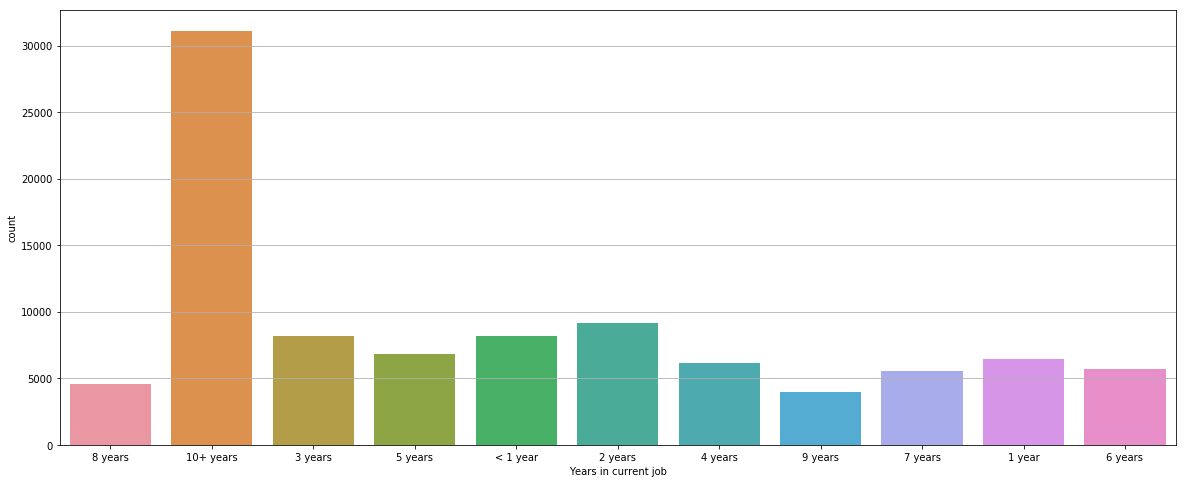

In [20]:
plt.figure(figsize=(20,8))
plt.grid()
sns.countplot(df['Years in current job'])

10+ years встречается чаще всего, поэтому Null'ы заполняем им

In [21]:
df['Years in current job'].fillna('10+ years', inplace=True)

In [22]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19149
Annual Income                   19149
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      194
Tax Liens                           0
dtype: int64

Что там с Bankruptcies

In [23]:
df['Bankruptcies'].unique()

array([ 1.,  0.,  2.,  3., nan,  5.,  4.,  7.,  6.])

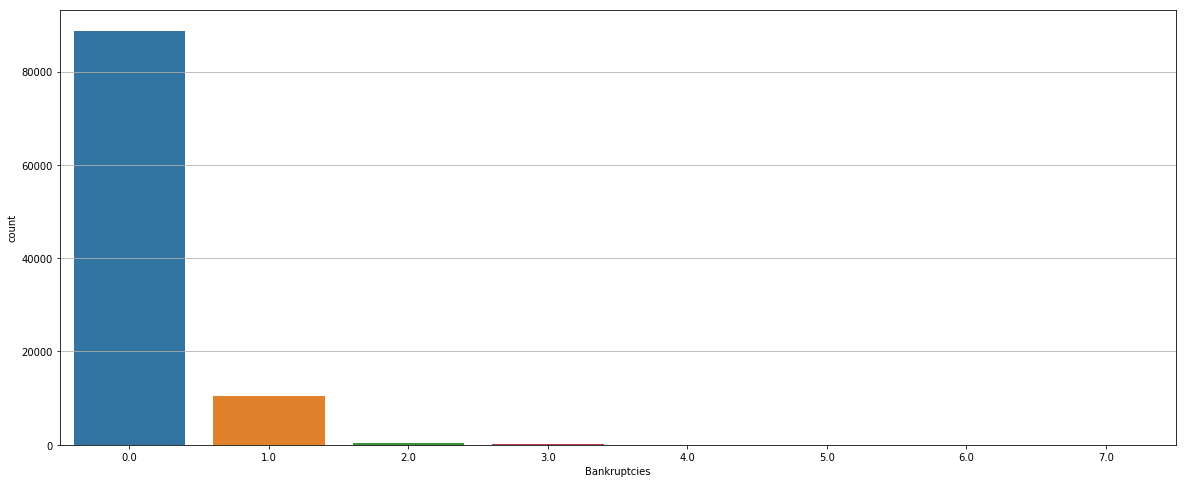

In [24]:
plt.figure(figsize=(20,8))
plt.grid()
sns.countplot(df['Bankruptcies'])

Решим, что 194 человека никогда не были банкротами

In [25]:
df['Bankruptcies'].fillna(0, inplace=True)

In [26]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19149
Annual Income                   19149
Years in current job                0
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent        0
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                        0
Tax Liens                           0
dtype: int64

Надо подумать, чем заполнить null'ы в Credit Score и Annual Income

In [27]:
df['Credit Score'].describe()

count    80839.000000
mean      1076.409926
std       1475.315593
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

Это странно, потому что Credit Score не может быть больше 850 (https://www.experian.com/blogs/ask-experian/credit-education/score-basics/what-is-a-good-credit-score/ ). Надо посмотреть и исправить

In [28]:
df[df['Credit Score']>800]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602.0,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,-1.0,6.0,0.0,215308.0,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948.0,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,-1.0,4.0,0.0,132468.0,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692.0,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,48.0,9.0,0.0,254277.0,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012.0,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,-1.0,8.0,0.0,104633.0,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908.0,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,-1.0,5.0,0.0,474658.0,742720.0,0.0,0.0
97,87260afa-a95d-4507-9db0-c8eeb5db5aef,168cc347-945f-43d4-827b-1c06c7a80722,Charged Off,78738.0,Short Term,6240.0,536370.0,2 years,Rent,other,14034.92,10.5,15.0,14.0,0.0,138586.0,266112.0,0.0,0.0
117,a7e3baae-3dd8-46f4-a34c-c3e3971cdba3,3ecdcd82-6b30-4518-bdf9-92de5833caee,Charged Off,86174.0,Short Term,7210.0,837311.0,1 year,Home Mortgage,Debt Consolidation,10884.91,13.6,82.0,15.0,0.0,360867.0,671770.0,0.0,0.0
160,4d80c73f-7337-4fef-b1b1-d3caefda27ea,f20cccab-9676-4fba-a5c2-7e6d52d07bba,Charged Off,87912.0,Short Term,7500.0,960184.0,10+ years,Rent,Debt Consolidation,3432.73,43.3,42.0,9.0,0.0,86051.0,301026.0,0.0,0.0
165,cf253a51-88a0-46bd-8d82-5348d151dab5,fc950ca6-8f85-425c-a800-85a71a4e0870,Charged Off,168300.0,Long Term,7020.0,688522.0,2 years,Rent,other,11762.14,17.0,30.0,9.0,0.0,128041.0,273042.0,0.0,0.0
200,d458127e-9b19-4123-98ef-ef8da4035e33,91a2224e-3024-4b3c-848b-3ecf24503d71,Charged Off,322872.0,Long Term,7080.0,985245.0,10+ years,Home Mortgage,Home Improvements,10895.17,17.5,-1.0,7.0,0.0,106894.0,357698.0,0.0,0.0


In [29]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: (val /10) if val>850 else val)
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,-1.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,-1.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,-1.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [30]:
df['Credit Score'].describe()

count    80839.000000
mean       716.294363
std         28.296435
min        585.000000
25%        703.000000
50%        722.000000
75%        738.500000
max        751.000000
Name: Credit Score, dtype: float64

In [31]:
df['Annual Income'].describe()

count    8.083900e+04
mean     1.378287e+06
std      1.081398e+06
min      7.662700e+04
25%      8.488440e+05
50%      1.174105e+06
75%      1.650682e+06
max      1.655574e+08
Name: Annual Income, dtype: float64

Как вариант - средними значениями, но лучше медианой

In [32]:
df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)

In [33]:
df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)

In [34]:
df.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [35]:
df.shape

(99988, 19)

In [36]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,9.998800e+04,99988.000000,9.998800e+04,99988.000000,99988.000000,99988.000000,99988.000000,99988.000000,9.998800e+04,9.998800e+04,99988.000000,99988.000000
mean,1.176085e+07,717.387066,1.339183e+06,18473.354105,18.198797,15.822719,11.128565,0.168310,2.946256e+05,7.580791e+05,0.117514,0.029314
std,3.178439e+07,25.541831,9.756612e+05,12174.916973,7.015470,23.402362,5.009919,0.482717,3.761568e+05,8.342374e+06,0.351124,0.258185
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,709.000000,9.311378e+05,10214.685000,13.500000,-1.000000,8.000000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122680e+05,722.000000,1.174105e+06,16221.155000,16.900000,-1.000000,10.000000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,735.000000,1.512704e+06,24012.295000,21.700000,29.000000,14.000000,0.000000,3.679350e+05,7.828535e+05,0.000000,0.000000
max,1.000000e+08,751.000000,1.655574e+08,435843.280000,70.500000,176.000000,76.000000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


# Формирование обучающей, тестовой и валидационной выборок

Формируем выборку

In [37]:
X = df.drop(['Loan ID', 'Customer ID', 'Loan Status'], axis=1)
Y = df['Loan Status']

In [38]:
X.head()

,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,-1.0,6.0,1.0,228190.0,416746.0,1.0,0.0
1,262328.0,Short Term,722.0,1174105.0,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,-1.0,9.0,0.0,256329.0,386958.0,0.0,0.0
4,176220.0,Short Term,722.0,1174105.0,5 years,Rent,Debt Consolidation,20639.70,6.1,-1.0,15.0,0.0,253460.0,427174.0,0.0,0.0


In [39]:
Y.head()

0    Fully Paid
1    Fully Paid
2    Fully Paid
3    Fully Paid
4    Fully Paid
Name: Loan Status, dtype: object

In [40]:
Y.value_counts()

Fully Paid     77351
Charged Off    22637
Name: Loan Status, dtype: int64

In [41]:
Y = pd.get_dummies(Y)['Fully Paid']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Fully Paid, dtype: uint8

In [42]:
X = pd.get_dummies(X)
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Years in current job_< 1 year,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.0,1167493.0,5214.74,17.2,-1.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,262328.0,722.0,1174105.0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.0,806949.0,8741.90,12.0,-1.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,176220.0,722.0,1174105.0,20639.70,6.1,-1.0,15.0,0.0,253460.0,427174.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
X.isnull().sum()

Current Loan Amount               0
Credit Score                      0
Annual Income                     0
Monthly Debt                      0
Years of Credit History           0
Months since last delinquent      0
Number of Open Accounts           0
Number of Credit Problems         0
Current Credit Balance            0
Maximum Open Credit               0
Bankruptcies                      0
Tax Liens                         0
Term_Long Term                    0
Term_Short Term                   0
Years in current job_1 year       0
Years in current job_10+ years    0
Years in current job_2 years      0
Years in current job_3 years      0
Years in current job_4 years      0
Years in current job_5 years      0
Years in current job_6 years      0
Years in current job_7 years      0
Years in current job_8 years      0
Years in current job_9 years      0
Years in current job_< 1 year     0
Home Ownership_HaveMortgage       0
Home Ownership_Home Mortgage      0
Home Ownership_Own Home     

Нужно убрать некоторые колонки, чтобы не было мультиколлинеарности

In [44]:
X = X.drop(['Purpose_other', 'Term_Short Term', 'Years in current job_< 1 year', 'Home Ownership_Rent']
           , axis=1)
X.head()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Years in current job_1 year,Years in current job_10+ years,Years in current job_2 years,Years in current job_3 years,Years in current job_4 years,Years in current job_5 years,Years in current job_6 years,Years in current job_7 years,Years in current job_8 years,Years in current job_9 years,Home Ownership_HaveMortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Purpose_Business Loan,Purpose_Buy House,Purpose_Buy a Car,Purpose_Debt Consolidation,Purpose_Educational Expenses,Purpose_Home Improvements,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,445412.0,709.0,1167493.0,5214.74,17.2,-1.0,6.0,1.0,228190.0,416746.0,1.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,262328.0,722.0,1174105.0,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,347666.0,721.0,806949.0,8741.90,12.0,-1.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,176220.0,722.0,1174105.0,20639.70,6.1,-1.0,15.0,0.0,253460.0,427174.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Делим выборку на train, test, validation

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_wov, X_validation, Y_wov, Y_validation = train_test_split(X, Y, test_size=0.33, random_state=42)

In [47]:
Y_wov.value_counts()

1    51830
0    15161
Name: Fully Paid, dtype: int64

In [48]:
Y_validation.value_counts()

1    25521
0     7476
Name: Fully Paid, dtype: int64

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X_wov, Y_wov, test_size=0.33, random_state=42)

In [50]:
Y_train.head()

17646    1
92761    1
6709     1
75229    0
14071    1
Name: Fully Paid, dtype: uint8

In [51]:
Y_train.value_counts()

1    34677
0    10206
Name: Fully Paid, dtype: int64

In [52]:
Y_test.value_counts()

1    17153
0     4955
Name: Fully Paid, dtype: int64

# Встроенный Bagging

Для бэггинга не обязательно проводить отбор признаков, поэтому начинаем с него.

Во встроенном BaggingClassifier можно использовать базовый классификатор только одного вида.

In [53]:
from sklearn.ensemble import BaggingClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
    
neighbors = KNeighborsClassifier(n_neighbors=5)

In [55]:
from sklearn import tree
    
tree_clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 5)

In [56]:
bagging_clf = BaggingClassifier(base_estimator=neighbors, n_estimators=10, random_state=0).fit(X_train, Y_train)

In [57]:
bagging_clf.score(X_validation, Y_validation)

0.732612055641422

In [58]:
bagging_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=10, random_state=0).fit(X_train, Y_train)

In [59]:
bagging_clf.score(X_validation, Y_validation)

0.7737067006091463

Рассчитаем ответы на тестовой и валидационной выборках

In [60]:
bagging_clf_test_predicted = bagging_clf.predict(X_test)
bagging_clf_valid_predicted = bagging_clf.predict(X_validation)

Нас не устраивает подгон модели только по одному базовому алгоритму, поэтому пишем свой бэггинг.

# Самопальный Bagging

Критерий регулярности - средняя ошибка на контрольных данных

http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%93%D0%A3%D0%90#.D0.9A.D1.80.D0.B8.D1.82.D0.B5.D1.80.D0.B8.D0.B9_.D1.80.D0.B5.D0.B3.D1.83.D0.BB.D1.8F.D1.80.D0.BD.D0.BE.D1.81.D1.82.D0.B8

In [61]:
def hold_out_error(test, predicted):
    err = 0
    sq = 0
    
    for i in range(len(test)):
        err += pow(test[i] - predicted[i],2)
        sq += pow(test[i], 2)
        
    return err/sq

Далее задаем базовые алгоритмы. Всего выбрали 5 базовых алгоритмов:
* линейная регрессия
* логистическая регрессия
* дерево решений
* метод k ближайших соседей
* многослойный перцептрон

Линейная регрессия

In [62]:
def linear(xtrain, ytrain, xtest):
    from sklearn import linear_model
    
    linear = linear_model.LinearRegression()
    linear.fit(xtrain, ytrain)
    predicted = linear.predict(xtest)
    
    for i in range(len(predicted)):
        predicted[i] = round(predicted[i])
        
    return predicted, linear

In [63]:
Y_linear_predicted, linear_clf = linear(X_train, Y_train, X_test)
Y_linear_predicted

array([1., 1., 1., ..., 1., 1., 1.])

In [64]:
hold_out_error(Y_test.values, Y_linear_predicted)

0.2889873491517519

In [65]:
def linear_predict(clf, validation):
    predicted = clf.predict(validation)
    for i in range(len(predicted)):
        predicted[i] = round(predicted[i])
        
    return predicted

In [66]:
Y_linear_validation_predicted = linear_predict(linear_clf, X_validation)
Y_linear_validation_predicted

array([1., 1., 1., ..., 1., 1., 1.])

In [67]:
hold_out_error(Y_validation.values, Y_linear_validation_predicted)

0.2927393127228557

Логистическая регрессия

In [68]:
def logistic(xtrain, ytrain, xtest):
    from sklearn.linear_model import LogisticRegression
    
    logistic = LogisticRegression()
    logistic.fit(xtrain, ytrain)
    predicted_uint8 = logistic.predict(xtest)
    
    predicted = []    
    for i in range(len(predicted_uint8)):
        predicted_uint8[i] = round(predicted_uint8[i])
        predicted.append(float(predicted_uint8[i]))
        
    return predicted, logistic

In [69]:
Y_logistic_predicted, logistic_clf = logistic(X_train, Y_train, X_test)
Y_logistic_predicted

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [70]:
hold_out_error(Y_test.values, Y_logistic_predicted)

0.2888707514720457

In [71]:
def logistic_predict(clf, validation):
    predicted_uint8 = clf.predict(validation)
    predicted = []    
    for i in range(len(predicted_uint8)):
        predicted_uint8[i] = round(predicted_uint8[i])
        predicted.append(float(predicted_uint8[i]))
        
    return predicted

In [72]:
Y_logistic_validation_predicted = logistic_predict(logistic_clf, X_validation)
Y_logistic_validation_predicted

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [73]:
hold_out_error(Y_validation.values, Y_logistic_validation_predicted)

0.2929352298107441

Дерево решений

In [74]:
def tree(xtrain, ytrain, xtest):
    from sklearn import tree
    
    tclf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 5)
    tclf.fit(xtrain, ytrain)
    predicted_uint8 = tclf.predict(xtest)
    
    predicted = []    
    for i in range(len(predicted_uint8)):
        predicted.append(float(predicted_uint8[i]))
    
    return predicted, tclf

In [75]:
Y_tree_predicted, tree_clf = tree(X_train, Y_train, X_test)
Y_tree_predicted

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [76]:
hold_out_error(Y_test.values, Y_tree_predicted)

0.2888707514720457

In [77]:
def tree_predict(clf, validation):
    predicted_uint8 = clf.predict(validation)
    predicted = []    
    for i in range(len(predicted_uint8)):
        predicted.append(float(predicted_uint8[i]))
        
    return predicted

In [78]:
Y_tree_validation_predicted = tree_predict(tree_clf, X_validation)
Y_tree_validation_predicted

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [79]:
hold_out_error(Y_validation.values, Y_tree_validation_predicted)

0.2929352298107441

k ближайших соседей

In [80]:
def k_neighbors(xtrain, ytrain, xtest):
    from sklearn.neighbors import KNeighborsClassifier
    
    neighbors = KNeighborsClassifier(n_neighbors=5)
    neighbors.fit(xtrain, ytrain)
    predicted_uint8 = neighbors.predict(xtest)
    
    predicted = []    
    for i in range(len(predicted_uint8)):
        predicted.append(float(predicted_uint8[i]))
    
    return predicted, neighbors   

In [81]:
Y_k_neighbors_predicted, k_neighbors_clf = k_neighbors(X_train, Y_train, X_test)
Y_k_neighbors_predicted

[1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [82]:
hold_out_error(Y_test.values, Y_k_neighbors_predicted)

0.3405818224217338

In [83]:
def k_neighbors_predict(clf, validation):
    predicted_uint8 = clf.predict(validation)
    predicted = []    
    for i in range(len(predicted_uint8)):
        predicted.append(float(predicted_uint8[i]))
        
    return predicted

In [84]:
Y_k_neighbors_validation_predicted = k_neighbors_predict(k_neighbors_clf, X_validation)
Y_k_neighbors_validation_predicted

[0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0

In [85]:
hold_out_error(Y_validation.values, Y_k_neighbors_validation_predicted)

0.34837976568316287

Многослойный персептрон

In [86]:
def MLP(xtrain, ytrain, xtest):
    from sklearn.neural_network import MLPClassifier
    
    clf = MLPClassifier(max_iter=100)
    clf.fit(xtrain, ytrain)
    predicted_uint8 = clf.predict(xtest)
    
    predicted = []    
    for i in range(len(predicted_uint8)):
        predicted.append(float(predicted_uint8[i]))
    
    return predicted, clf  

In [87]:
Y_MLP_predicted, MLP_clf = MLP(X_train, Y_train, X_test)

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [88]:
hold_out_error(Y_test.values, Y_MLP_predicted)

0.28962863639013586

In [89]:
def MLP_predict(clf, validation):
    predicted_uint8 = clf.predict(validation)
    predicted = []    
    for i in range(len(predicted_uint8)):
        predicted.append(float(predicted_uint8[i]))
        
    return predicted

In [90]:
Y_MLP_validation_predicted = MLP_predict(MLP_clf, X_validation)
Y_MLP_validation_predicted

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [91]:
hold_out_error(Y_validation.values, Y_MLP_validation_predicted)

0.29391481525018615

Bagging смешиваем с RSM, т.к. у нас много лишних признаков

Метод случайных подпространств - формирование подпространства

* n - длина признакового подописания
* l - длина выборки

In [92]:
def create_subspace(xtrain, ytrain, xtest, l, n):
    import random
    
#отбор признаков
    sheme = [0]*len(xtrain.columns)
    while (sum(sheme)<n):
        i = random.randint(0,len(xtrain.columns)-1)
        sheme[i] = 1
    cols = []
    for i in range(len(xtrain.columns)):
        if sheme[i] == 1:
            cols.append(xtrain.columns[i])
    X_train_RSM_all_rows = xtrain[cols]
            
#отбор объектов
    X_train_RSM = pd.DataFrame(columns=cols)
    Y_train_RSM = pd.Series()
    for i in range(l):
        j = random.randint(0, X_train_RSM_all_rows.shape[0] - 1)
        X_train_RSM = X_train_RSM.append(X_train_RSM_all_rows.iloc[j])
        Y_train_RSM = Y_train_RSM.append(pd.Series(ytrain.iloc[j]),ignore_index=True)
        
#отбор признаков тестовой выборки   
    X_test_RSM = xtest[cols]
    
    return X_train_RSM, Y_train_RSM, X_test_RSM, cols

In [93]:
X_train_RSM, Y_train_RSM, X_test_RSM, cols = create_subspace(X_train, Y_train, X_test, 1000, 10)

In [94]:
X_train_RSM.head()

,Current Loan Amount,Credit Score,Years of Credit History,Tax Liens,Years in current job_2 years,Years in current job_5 years,Home Ownership_Own Home,Purpose_Business Loan,Purpose_Buy House,Purpose_small_business
12106,269126.0,722.0,25.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43830,246356.0,722.0,16.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43382,154132.0,703.0,9.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72377,423610.0,702.0,13.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43706,333498.0,690.0,26.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [95]:
Y_train_RSM.head()

0    1
1    1
2    0
3    1
4    1
dtype: int64

In [96]:
X_test_RSM.head()

,Current Loan Amount,Credit Score,Years of Credit History,Tax Liens,Years in current job_2 years,Years in current job_5 years,Home Ownership_Own Home,Purpose_Business Loan,Purpose_Buy House,Purpose_small_business
48557,768768.0,690.0,30.0,0.0,0,0,0,0,0,0
2148,226468.0,710.0,12.9,0.0,0,0,0,0,0,0
5942,324258.0,722.0,19.4,0.0,0,0,0,0,0,0
66637,99999999.0,742.0,11.0,0.0,0,0,0,0,0,0
88914,773542.0,725.0,16.4,0.0,0,0,0,0,0,0


In [97]:
cols

['Current Loan Amount',
 'Credit Score',
 'Years of Credit History',
 'Tax Liens',
 'Years in current job_2 years',
 'Years in current job_5 years',
 'Home Ownership_Own Home',
 'Purpose_Business Loan',
 'Purpose_Buy House',
 'Purpose_small_business']

Собственно bagging

In [98]:
basic_algorithms_train = {'linear': linear, 'logistic': logistic, 
                    'tree': tree, 'k_neighbors': k_neighbors,
                    'MLP': MLP}

In [99]:
basic_algorithms_test = {'linear': linear_predict, 'logistic': logistic_predict, 
                    'tree': tree_predict, 'k_neighbors': k_neighbors_predict,
                    'MLP': MLP_predict}

In [100]:
def bagging_fit(xtrain, ytrain, xtest, ytest, ba_train, ba_test, l, n, eps1, eps2):
    good_clfs = {}
    
    for key in ba_train:
        X_train_RSM, Y_train_RSM, X_test_RSM, cols = create_subspace(xtrain, ytrain, xtest, l, n)
        Y_pred, clf = ba_train[key](X_train_RSM, Y_train_RSM, X_test_RSM)
        q2 = hold_out_error(ytest.values, Y_pred)
        y_train_pred = ba_test[key](clf, X_train_RSM)
        q1 = hold_out_error(Y_train_RSM, y_train_pred)
        if (q1<=eps1) and (q2<=eps2):
            good_clfs[key] = [clf, cols]
            
    return good_clfs    

In [101]:
def bagging_predict(compos, ba_test, validation):
    y_validation_pred = []
    for key in compos:
        y_key_pred = ba_test[key](compos[key][0],validation[compos[key][1]])
        y_validation_pred.append(y_key_pred)
    y_validation_final = []
    for i in range(len(y_validation_pred[0])):
        s = 0
        for j in range(len(y_validation_pred)):
            s += y_validation_pred[j][i]    
        answer = round(s/len(y_validation_pred))
        y_validation_final.append(answer)
    
    return y_validation_final

for key in basic_algorithms_train:
    X_train_RSM, Y_train_RSM, X_test_RSM = create_subspace(X_train, Y_train, X_test, 1000, 10)
    Y_pred, clf = basic_algorithms_train[key](X_train_RSM, Y_train_RSM, X_test_RSM)
    q2 = hold_out_error(Y_test.values, Y_pred)
    y_train_pred = basic_algorithms_test[key](clf, X_train_RSM)
    q1 = hold_out_error(Y_train_RSM, y_train_pred)
    print(clf)
    print(key, q1, q2)

In [102]:
composition = bagging_fit(X_train, Y_train, X_test, Y_test, basic_algorithms_train, basic_algorithms_test
                          , 1000, 10, 0.3, 0.31)

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [103]:
composition

{'linear': [LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  ['Annual Income',
   'Maximum Open Credit',
   'Bankruptcies',
   'Years in current job_6 years',
   'Years in current job_8 years',
   'Home Ownership_HaveMortgage',
   'Purpose_Business Loan',
   'Purpose_Educational Expenses',
   'Purpose_Other',
   'Purpose_major_purchase']]}

Рассчитаем ответы на тестовой и валидационной выборках

In [104]:
Y_bagging_test_predict = bagging_predict(composition, basic_algorithms_test, X_test)
Y_bagging_validation_predict = bagging_predict(composition, basic_algorithms_test, X_validation)

In [105]:
hold_out_error(Y_validation.values, Y_bagging_validation_predict)

0.3103326672152345

# Отбор признаков

Отбираем признаки

In [106]:
import feature_selector

In [107]:
fs = feature_selector.FeatureSelector(data=X_train, labels=Y_train)

In [108]:
fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

0 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[132]	valid_0's auc: 0.697448
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[488]	valid_0's auc: 0.693163
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[87]	valid_0's auc: 0.704769
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[288]	valid_0's auc: 0.704926
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[224]	valid_0's auc: 0.695878
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[200]	valid_0's auc: 0.71015
Training until validation scores don't improve fo

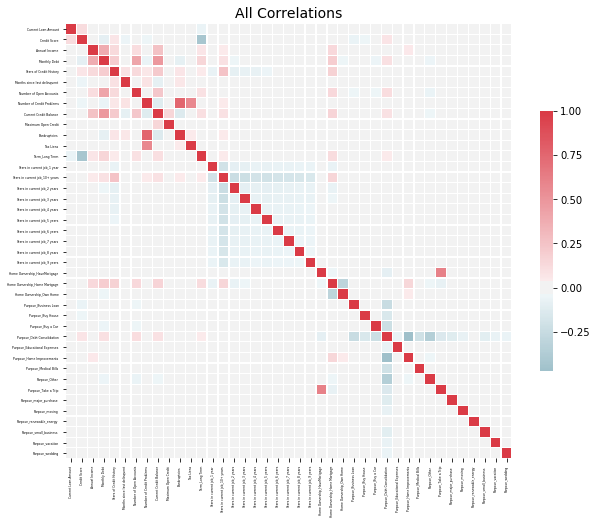

In [109]:
fs.plot_collinear(plot_all=True)

10 features with a correlation magnitude greater than 0.30.



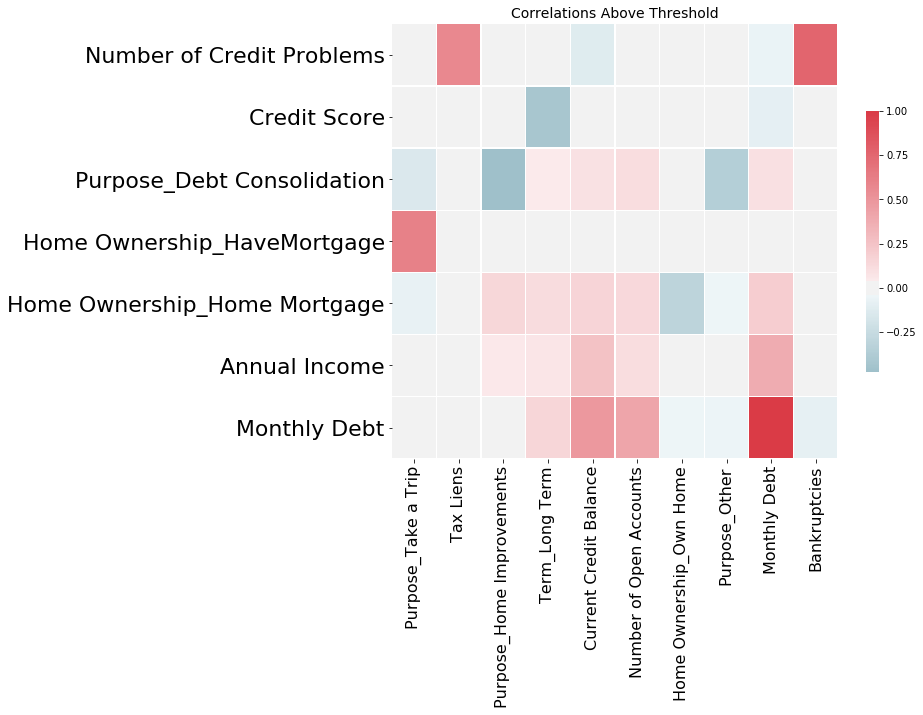

In [110]:
fs.identify_collinear(correlation_threshold=0.3)
fs.plot_collinear()

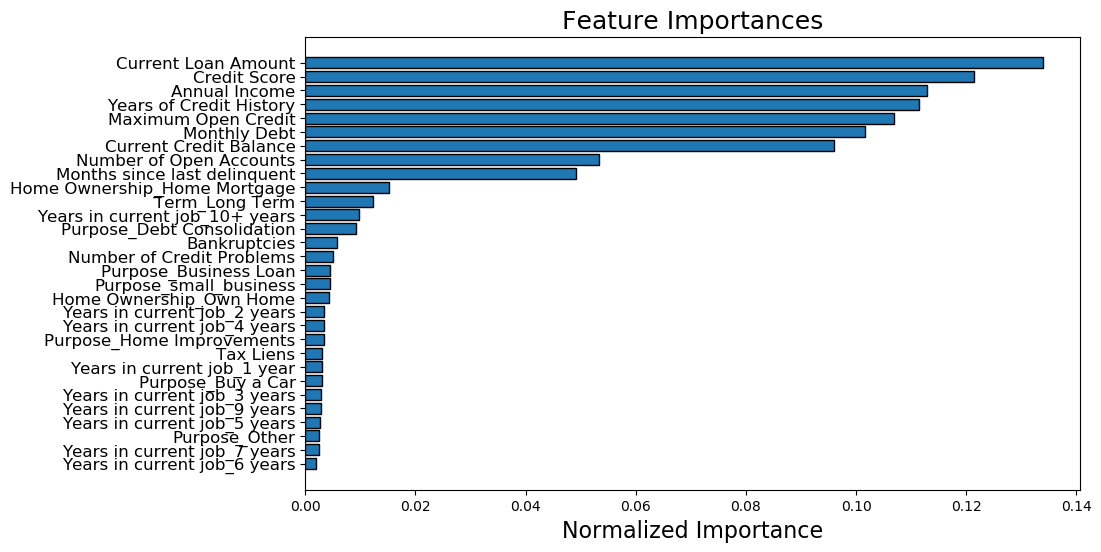

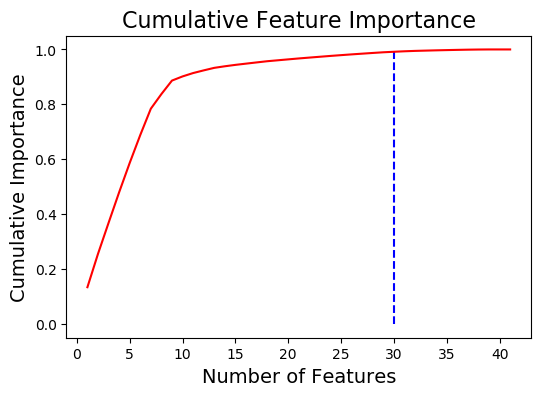

30 features required for 0.99 of cumulative importance


In [111]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 30)

In [112]:
low_importance_features = fs.ops['low_importance']
low_importance_features

['Years in current job_6 years',
 'Years in current job_8 years',
 'Purpose_Take a Trip',
 'Purpose_moving',
 'Purpose_Medical Bills',
 'Purpose_Buy House',
 'Purpose_vacation',
 'Purpose_major_purchase',
 'Home Ownership_HaveMortgage',
 'Purpose_Educational Expenses',
 'Purpose_renewable_energy',
 'Purpose_wedding']

Попробуем сделать то же самое с помощью RandomForest

In [113]:
import numpy as np

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
np.random.seed(0)
clf_rf = RandomForestClassifier(criterion='entropy')

In [116]:
clf_rf.fit(X_train, Y_train)

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [117]:
Y_rf_validation_predicted = clf_rf.predict(X_validation)
Y_rf_validation_predicted

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

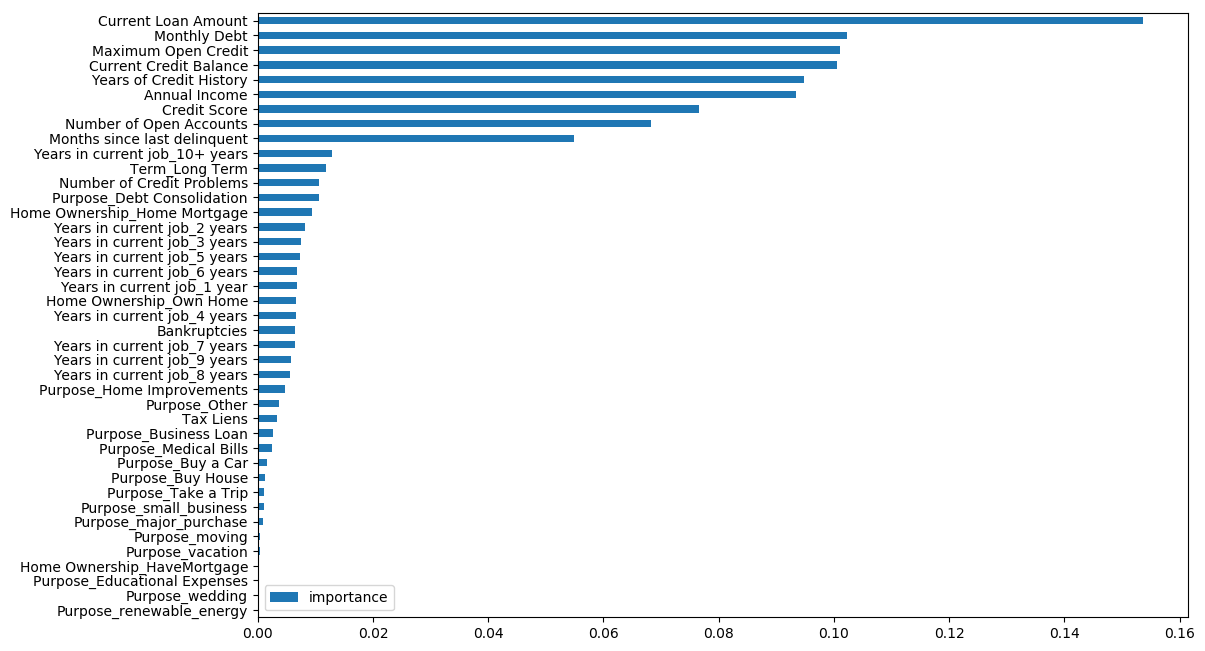

In [118]:
imp = pd.DataFrame(clf_rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [119]:
imp.sort_values('importance', ascending=False)

,importance
Current Loan Amount,0.153712
Monthly Debt,0.102289
Maximum Open Credit,0.101119
Current Credit Balance,0.100560
Years of Credit History,0.094729
Annual Income,0.093459
Credit Score,0.076604
Number of Open Accounts,0.068211
Months since last delinquent,0.054843
Years in current job_10+ years,0.012950


Другие способы отбора признаков отсюда: https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

Отбор признаков через логистическую регрессию

In [120]:
from sklearn.feature_selection import RFE

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
model = LogisticRegression()

In [123]:
rfe = RFE(model, 9)

In [124]:
fit = rfe.fit(X_train, Y_train)

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [125]:
for i in range(len(X_train.columns)):
    if fit.support_[i]:
        print(X_train.columns[i])

Current Loan Amount
Credit Score
Annual Income
Monthly Debt
Years of Credit History
Months since last delinquent
Number of Open Accounts
Current Credit Balance
Maximum Open Credit


Для алгоритмов бустинга и логистической регрессии выберем следующие признаки:
* Current Loan Amount
* Monthly Debt
* Current Credit Balance 
* Years of Credit History
* Annual Income
* Credit Score
* Number of Open Accounts
* Months since last delinquent
* Maximum Open Credit

Сформируем новые обучающую, тестовую и валидационную выборки, оставив только необходимые признаки.

In [126]:
X_train_selected = X_train[['Current Loan Amount', 'Monthly Debt', 'Current Credit Balance'
                          , 'Years of Credit History', 'Annual Income', 'Credit Score'
                          , 'Number of Open Accounts', 'Months since last delinquent', 'Maximum Open Credit']]

In [127]:
X_test_selected = X_test[['Current Loan Amount', 'Monthly Debt', 'Current Credit Balance'
                          , 'Years of Credit History', 'Annual Income', 'Credit Score'
                          , 'Number of Open Accounts', 'Months since last delinquent', 'Maximum Open Credit']]

In [128]:
X_validation_selected = X_validation[['Current Loan Amount', 'Monthly Debt', 'Current Credit Balance'
                          , 'Years of Credit History', 'Annual Income', 'Credit Score'
                          , 'Number of Open Accounts', 'Months since last delinquent', 'Maximum Open Credit']]

# AdaBoost

Начнем с AdaBoost

Так же, как и бэггинг, он принимает на вход классификатор только одного вида.

In [129]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
from sklearn import tree  
tree_clf = tree.DecisionTreeClassifier(criterion='gini', max_depth = 5)

In [131]:
adaboost_clf = AdaBoostClassifier(base_estimator=tree_clf, n_estimators=100).fit(X_train_selected, Y_train)

In [132]:
adaboost_clf.score(X_validation_selected, Y_validation)

0.743097857380974

Рассчитаем ответы для тестовой и валидационной выборок

In [133]:
adaboost_clf_test_predicted = adaboost_clf.predict(X_test_selected)
adaboost_clf_valid_predicted = adaboost_clf.predict(X_validation_selected)

# Логистическая регрессия

Логистическая регрессия

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
logistic_clf = LogisticRegression()

Подберем оптимальные параметры с помощью gridSearchCV

In [136]:
from sklearn.model_selection import GridSearchCV

Зададим значения параметров, из которых будем выбирать

In [137]:
params = {'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

In [138]:
logistic_search = GridSearchCV(logistic_clf, params, cv=5)

In [139]:
logistic_search.fit(X_train_selected, Y_train)

C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\bagro\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line searc

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [140]:
logistic_search.best_params_

{'solver': 'sag'}

In [141]:
logistic_clf_best = logistic_search.best_estimator_

In [142]:
logistic_clf_best.score(X_validation_selected, Y_validation)

0.7734339485407764

Рассчитаем ответы для тестовой и валидационной выборок

In [143]:
logistic_clf_test_predicted = logistic_clf_best.predict(X_test_selected)
logistic_clf_valid_predicted = logistic_clf_best.predict(X_validation_selected)

# Метрики качества

Напомню, что для каждой из моделей мы рассчитали предсказанные значения:
* Встроенный бэггинг
    * bagging_clf_test_predicted
    * bagging_clf_valid_predicted
* Самопальный бэггинг
    * Y_bagging_test_predict
    * Y_bagging_validation_predict
* АдаБуст
    * adaboost_clf_test_predicted
    * adaboost_clf_valid_predicted
* Логистическая регрессия
    * logistic_clf_test_predicted
    * logistic_clf_valid_predicted

У нас есть, с чем их сравнивать:
* Y_test
* Y_validation

А раз так, то можно оценить качество построенных моделей

### 1.1.2 Критерий средней ошибки на контрольных данных

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

In [144]:
from sklearn.metrics import accuracy_score

Встроенный бэггинг - train

In [199]:
accuracy_score(bagging_clf.predict(X_train), Y_train)

0.7729207049439655

Встроенный бэггинг - test

In [145]:
accuracy_score(bagging_clf_test_predicted, Y_test)

0.7760539171340691

Встроенный бэггинг - validation

In [146]:
accuracy_score(bagging_clf_valid_predicted, Y_validation)

0.7737067006091463

Самопальный бэггинг - train

In [200]:
accuracy_score(bagging_predict(composition, basic_algorithms_test, X_train), Y_train)

0.7718958180157298

Самопальный бэггинг - test

In [147]:
accuracy_score(Y_bagging_test_predict, Y_test)

0.7752397322236294

Самопальный бэггинг - validation

In [148]:
accuracy_score(Y_bagging_validation_predict, Y_validation)

0.7727975270479135

АдаБуст - train

In [201]:
accuracy_score(adaboost_clf.predict(X_train_selected), Y_train)

0.8314729407570796

АдаБуст - test

In [149]:
accuracy_score(adaboost_clf_test_predicted, Y_test)

0.7435769857065315

АдаБуст - validation

In [150]:
accuracy_score(adaboost_clf_valid_predicted, Y_validation)

0.743097857380974

Логистическая регрессия - train

In [203]:
accuracy_score(logistic_clf_best.predict(X_train_selected), Y_train)

0.7726087828353719

Логистическая регрессия - test

In [151]:
accuracy_score(logistic_clf_test_predicted, Y_test)

0.7758729871539715

Логистическая регрессия - validation

In [152]:
accuracy_score(logistic_clf_valid_predicted, Y_validation)

0.7734339485407764

### Precision

https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

In [153]:
from sklearn.metrics import precision_score

Встроенный бэггинг - train

In [204]:
precision_score(bagging_clf.predict(X_train), Y_train, average='binary')

0.9999134873258932

Встроенный бэггинг - test

In [205]:
precision_score(bagging_clf_test_predicted, Y_test, average='binary')

0.9998834023202938

Встроенный бэггинг - validation

In [206]:
precision_score(bagging_clf_valid_predicted, Y_validation, average='binary')

0.9998824497472669

Самопальный бэггинг - train

In [207]:
precision_score(bagging_predict(composition, basic_algorithms_test, X_train), Y_train, average='weighted')

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9977119573166195

Самопальный бэггинг - test

In [208]:
precision_score(Y_bagging_test_predict, Y_test, average='weighted')

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.997718036283982

Самопальный бэггинг - validation

In [209]:
precision_score(Y_bagging_validation_predict, Y_validation, average='weighted')

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.9979825441927245

АдаБуст - train

In [210]:
precision_score(adaboost_clf.predict(X_train_selected), Y_train, average='binary')

0.9686824119733541

АдаБуст - test

In [211]:
precision_score(adaboost_clf_test_predicted, Y_test, average='binary')

0.9150585903340523

АдаБуст - validation

In [212]:
precision_score(adaboost_clf_valid_predicted, Y_validation, average='binary')

0.9164217703068062

Логистическая регрессия - train

In [213]:
precision_score(logistic_clf_best.predict(X_train_selected), Y_train, average='binary')

1.0

Логистическая регрессия - test

In [214]:
precision_score(logistic_clf_test_predicted, Y_test, average='binary')

1.0

Логистическая регрессия - validation

In [215]:
precision_score(logistic_clf_valid_predicted, Y_validation, average='binary')

1.0

### Recall

https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

In [162]:
from sklearn.metrics import recall_score

Встроенный бэггинг - train

In [216]:
recall_score(bagging_clf.predict(X_train), Y_train, average='binary')

0.7728863428660588

Встроенный бэггинг - test

In [217]:
recall_score(bagging_clf_test_predicted, Y_test, average='binary')

0.7760633484162895

Встроенный бэггинг - validation

In [218]:
recall_score(bagging_clf_valid_predicted, Y_validation, average='binary')

0.7736947425868655

Самопальный бэггинг - train

In [219]:
recall_score(bagging_predict(composition, basic_algorithms_test, X_train), Y_train, average='weighted')

0.7718958180157298

Самопальный бэггинг - test

In [220]:
recall_score(Y_bagging_test_predict, Y_test, average='weighted')

0.7752397322236294

Самопальный бэггинг - validation

In [221]:
recall_score(Y_bagging_validation_predict, Y_validation, average='weighted')

0.7727975270479135

АдаБуст - train

In [222]:
recall_score(adaboost_clf.predict(X_train_selected), Y_train, average='binary')

0.8383288826773815

АдаБуст - test

In [223]:
recall_score(adaboost_clf_test_predicted, Y_test, average='binary')

0.7884267631103075

АдаБуст - validation

In [225]:
recall_score(adaboost_clf_valid_predicted, Y_validation, average='binary')

0.786627203013588

Логистическая регрессия - train

In [226]:
recall_score(logistic_clf_best.predict(X_train_selected), Y_train, average='binary')

0.7726087828353719

Логистическая регрессия - test

In [227]:
recall_score(logistic_clf_test_predicted, Y_test, average='binary')

0.7758729871539715

Логистическая регрессия - validation

In [228]:
recall_score(logistic_clf_valid_predicted, Y_validation, average='binary')

0.7734339485407764

### F-мера

https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

In [171]:
from sklearn.metrics import f1_score

Встроенный бэггинг - train

In [229]:
f1_score(bagging_clf.predict(X_train), Y_train, average='binary')

0.8718632134774956

Встроенный бэггинг - test

In [230]:
f1_score(bagging_clf_test_predicted, Y_test, average='binary')

0.8738695131582299

Встроенный бэггинг - validation

In [231]:
f1_score(bagging_clf_valid_predicted, Y_validation, average='binary')

0.8723655197169375

Самопальный бэггинг - train

In [232]:
f1_score(bagging_predict(composition, basic_algorithms_test, X_train), Y_train, average='weighted')

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8702832895166814

Самопальный бэггинг - test

In [233]:
f1_score(Y_bagging_test_predict, Y_test, average='weighted')

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.872377597515508

Самопальный бэггинг - validation

In [234]:
f1_score(Y_bagging_validation_predict, Y_validation, average='weighted')

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.8709763237708156

АдаБуст - train

In [235]:
f1_score(adaboost_clf.predict(X_train_selected), Y_train, average='binary')

0.8988039493752175

АдаБуст - test

In [236]:
f1_score(adaboost_clf_test_predicted, Y_test, average='binary')

0.8470359677288796

АдаБуст - validation

In [237]:
f1_score(adaboost_clf_valid_predicted, Y_validation, average='binary')

0.8465784663276201

Логистическая регрессия - train

In [238]:
f1_score(logistic_clf_best.predict(X_train_selected), Y_train, average='binary')

0.8717194570135746

Логистическая регрессия - test

In [239]:
f1_score(logistic_clf_test_predicted, Y_test, average='binary')

0.8737933318050992

Логистическая регрессия - validation

In [240]:
f1_score(logistic_clf_valid_predicted, Y_validation, average='binary')

0.8722444376089408

### Коэффициент корреляции Мэтьюса

https://scikit-learn.org/stable/modules/model_evaluation.html#matthews-corrcoef

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html#sklearn.metrics.matthews_corrcoef

In [180]:
from sklearn.metrics import matthews_corrcoef

Встроенный бэггинг - train

In [241]:
matthews_corrcoef(bagging_clf.predict(X_train), Y_train)

0.031363131663050554

Встроенный бэггинг - test

In [243]:
matthews_corrcoef(bagging_clf_test_predicted, Y_test)

0.023993151818711596

Встроенный бэггинг - validation

In [244]:
matthews_corrcoef(bagging_clf_valid_predicted, Y_validation)

0.029213359492322576

Самопальный бэггинг - train

In [245]:
matthews_corrcoef(bagging_predict(composition, basic_algorithms_test, X_train), Y_train)

0.0013552966167318

Самопальный бэггинг - test

In [246]:
matthews_corrcoef(Y_bagging_test_predict, Y_test)

0.006220015114905901

Самопальный бэггинг - validation

In [247]:
matthews_corrcoef(Y_bagging_validation_predict, Y_validation)

0.00025026576302779254

АдаБуст - train

In [248]:
matthews_corrcoef(adaboost_clf.predict(X_train_selected), Y_train)

0.4523585048538169

АдаБуст - test

In [249]:
matthews_corrcoef(adaboost_clf_test_predicted, Y_test)

0.09055958673642762

АдаБуст - validation

In [250]:
matthews_corrcoef(adaboost_clf_valid_predicted, Y_validation)

0.09510719542589581

Логистическая регрессия - train

In [251]:
matthews_corrcoef(logistic_clf_best.predict(X_train_selected), Y_train)

C:\Users\bagro\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:872: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0

Логистическая регрессия - test

In [252]:
matthews_corrcoef(logistic_clf_test_predicted, Y_test)

0.0

Логистическая регрессия - validation

In [253]:
matthews_corrcoef(logistic_clf_valid_predicted, Y_validation)

0.0

### ROC-curve

https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics

In [189]:
from sklearn.metrics import roc_curve

In [190]:
import matplotlib.pyplot as plt

In [191]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

Встроенный бэггинг - test

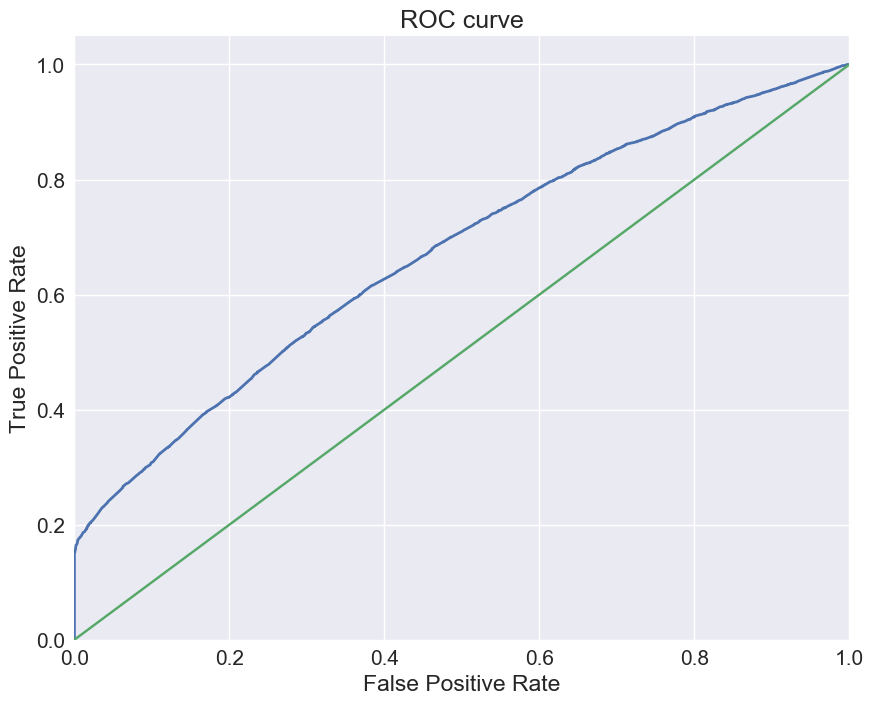

In [192]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y_test, bagging_clf.predict_proba(X_test)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Встроенный бэггинг - validation

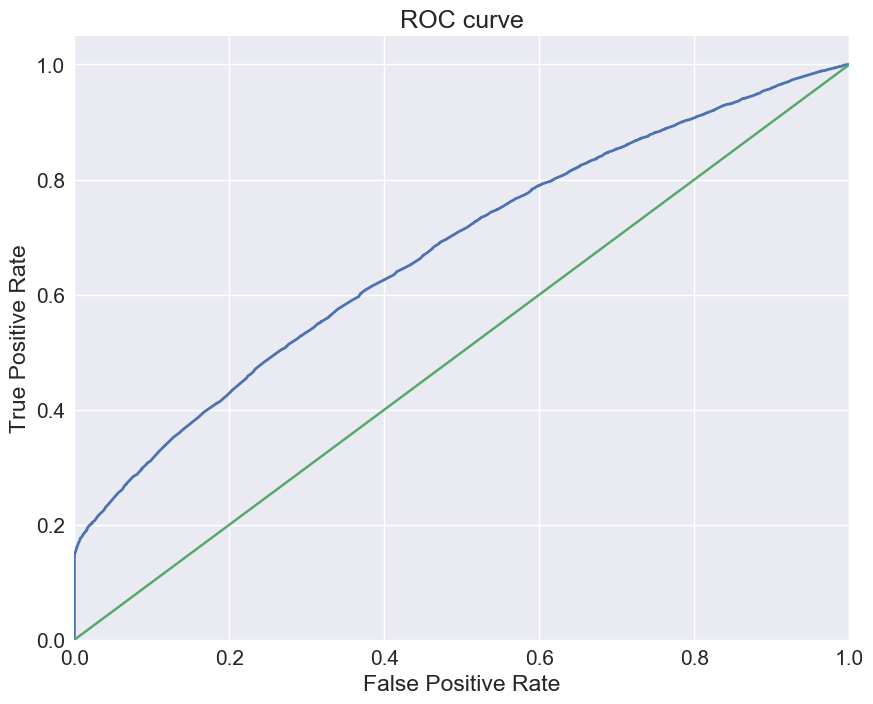

In [193]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y_validation, bagging_clf.predict_proba(X_validation)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Unfortunately, самопальный бэггинг не расчитывает вероятность :(

Самопальный бэггинг - test

Самопальный бэггинг - validation

АдаБуст - test

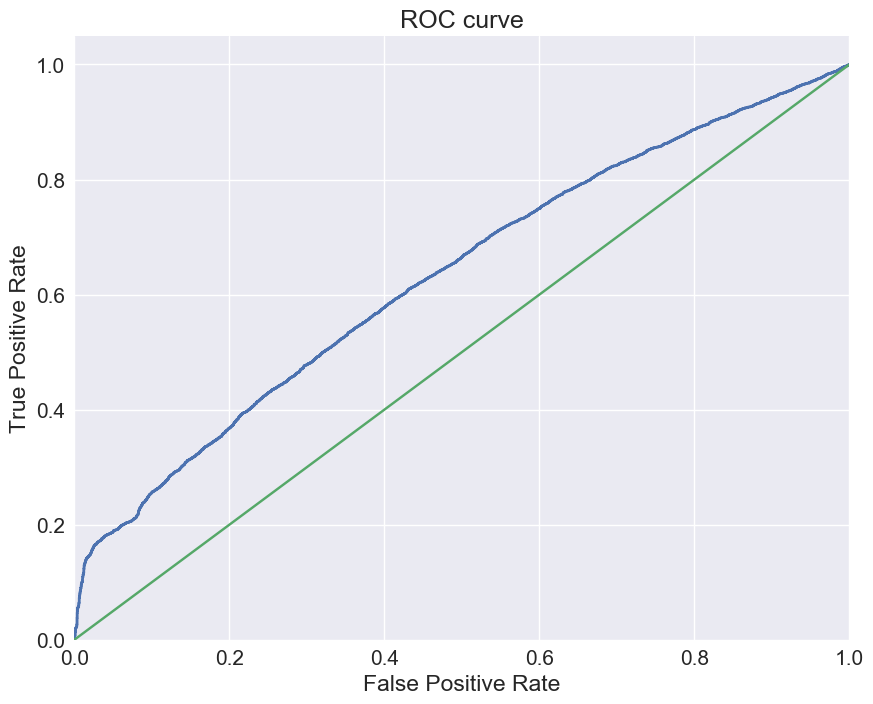

In [194]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y_test, adaboost_clf.predict_proba(X_test_selected)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

АдаБуст - validation

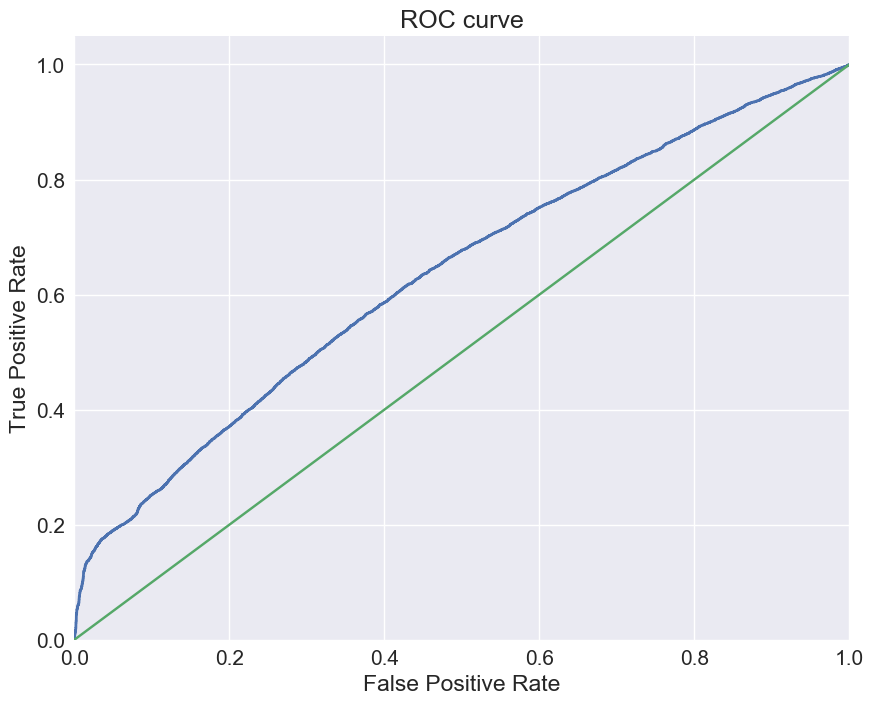

In [195]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y_validation, adaboost_clf.predict_proba(X_validation_selected)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Логистическая регрессия - test

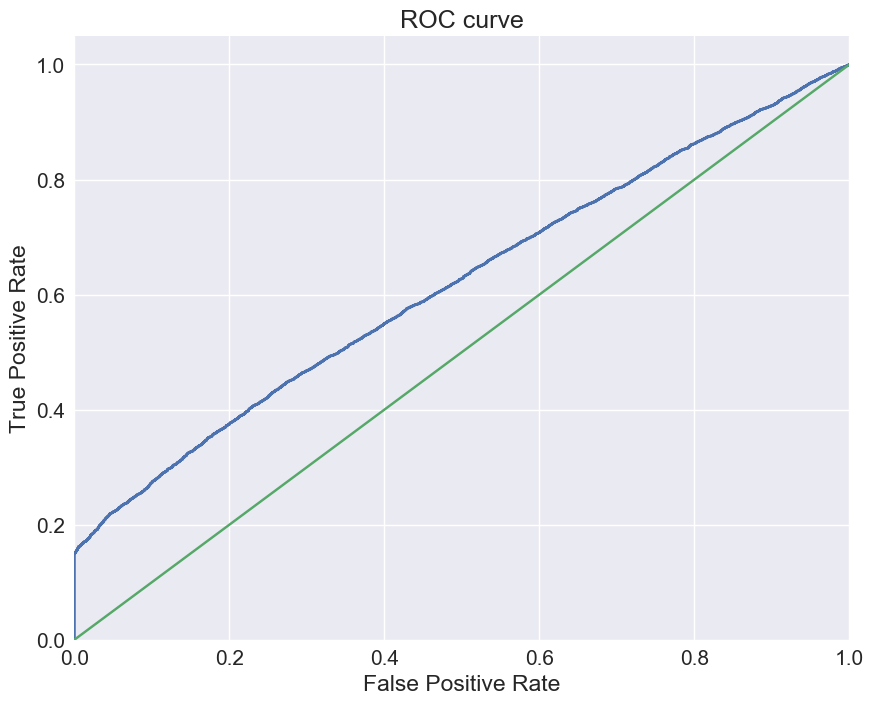

In [196]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y_test, logistic_clf_best.predict_proba(X_test_selected)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

Логистическая регрессия - validation

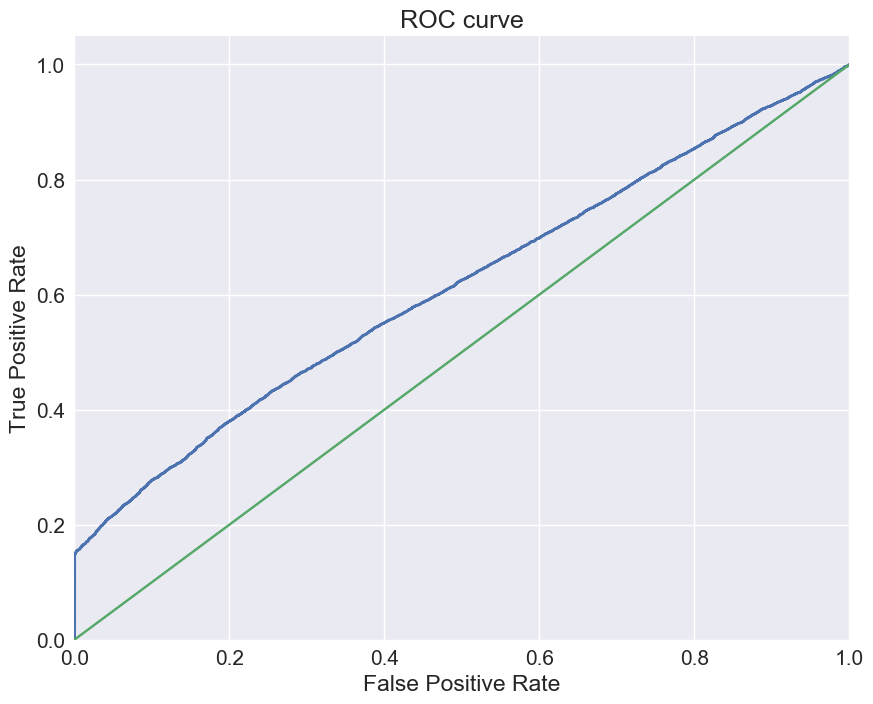

In [197]:
plt.figure(figsize=(10, 8))
fpr, tpr, thresholds = roc_curve(Y_validation, logistic_clf_best.predict_proba(X_validation_selected)[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

# Ну вроде все